In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [3]:
df = pd.read_csv('../input/vehicle-dataset-from-cardekho/car data.csv')

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']


In [9]:
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Manual' 'Automatic']
[0 1 3]


In [10]:
#check missing or null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

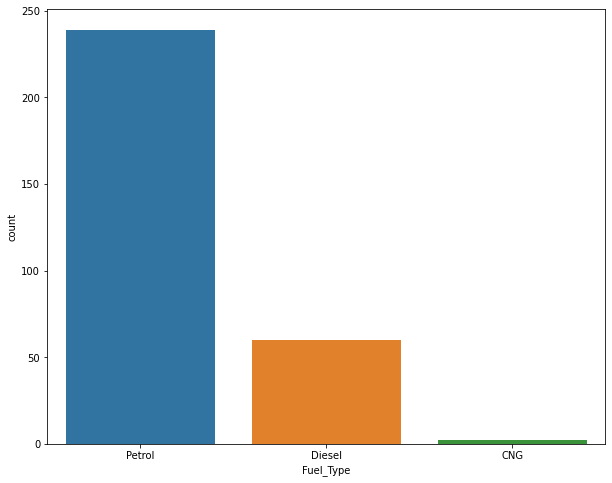

In [11]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['Fuel_Type'], data=df)

<AxesSubplot:xlabel='Fuel_Type', ylabel='Kms_Driven'>

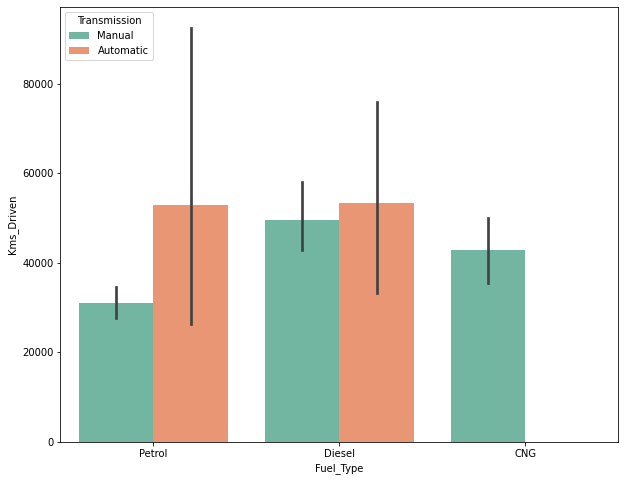

In [12]:

plt.figure(figsize=(10,8))
sns.barplot(x=df['Fuel_Type'],y=df['Kms_Driven'], hue=df['Transmission'] ,data=df, palette="Set2")

In [13]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [14]:
df_main = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [15]:
df_main['Current_year']=2021

In [16]:
df_main['Running years'] = df_main['Current_year'] - df_main['Year']

In [17]:
df_main.drop(['Year', 'Current_year'], axis=1, inplace=True)

In [18]:
df_main=pd.get_dummies(df_main, drop_first = True)

In [19]:
df_main.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Running years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [20]:
df_main.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Running years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Running years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


<AxesSubplot:>

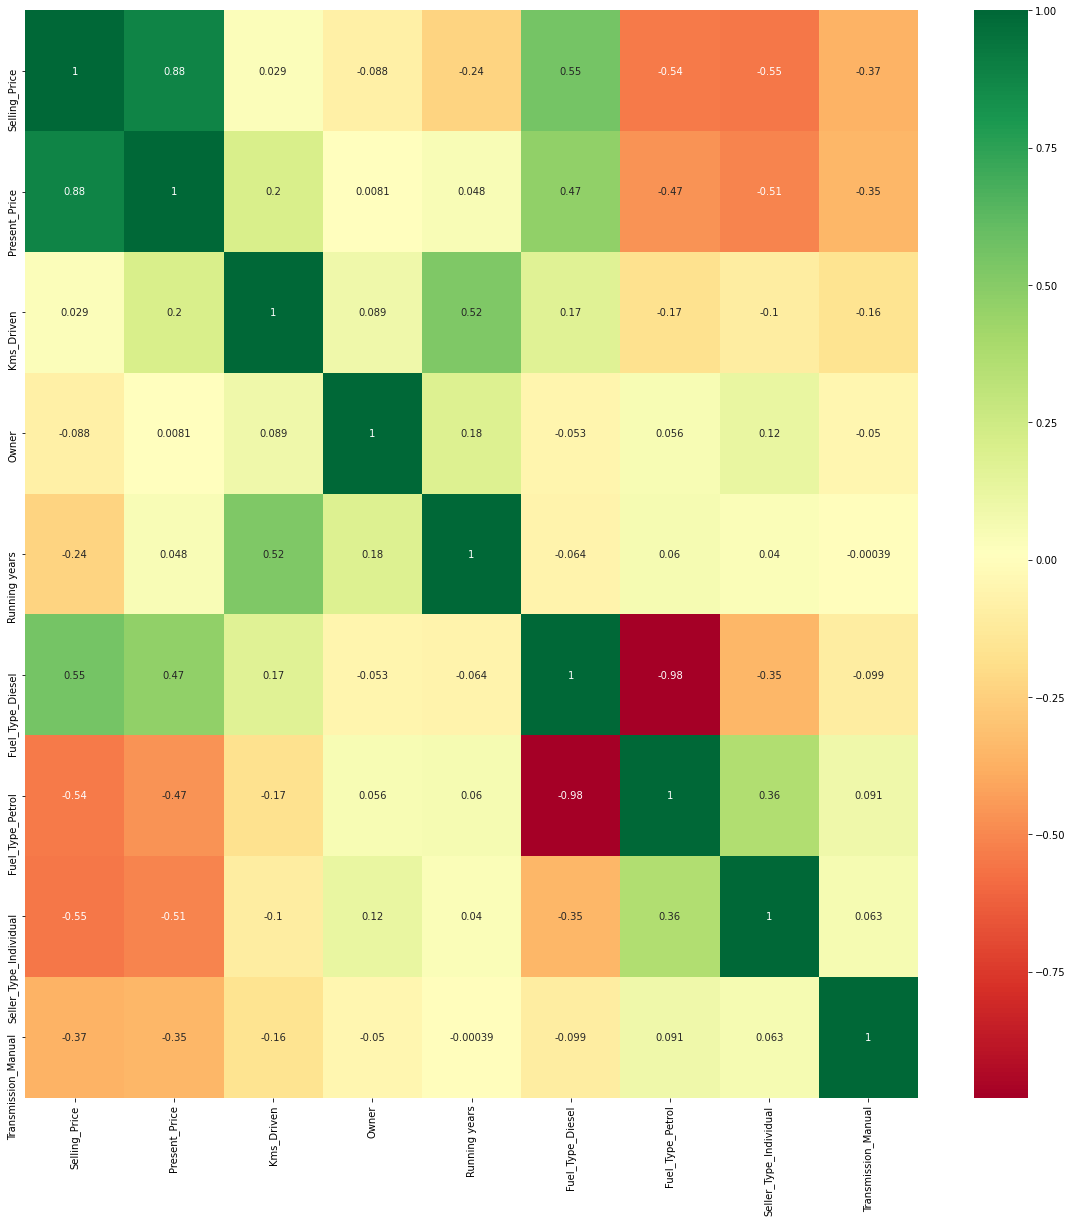

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(df_main.corr(), annot = True, cmap= "RdYlGn")

In [22]:
#dependant and independant features
X=df_main.iloc[:,1:]
y=df_main.iloc[:,0]

In [23]:
X.head()

,Present_Price,Kms_Driven,Owner,Running years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [24]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [25]:
#important features
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [26]:
print(model.feature_importances_)

[0.37047056 0.04032844 0.0004315  0.07720057 0.22697808 0.01240245
 0.12754126 0.14464713]


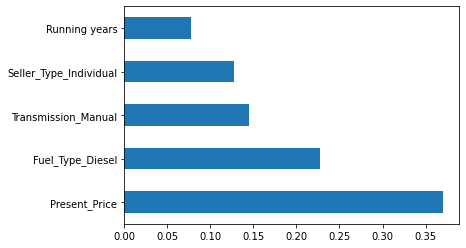

In [28]:
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)


In [31]:
X_train.shape

(240, 8)

In [32]:
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor()

In [36]:
#hyperparameters
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num =10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]
min_samples_split= [2,5, 10, 15, 100, 200]
min_samples_leaf = [1, 3, 5, 10]

In [37]:
from sklearn.model_selection import RandomizedSearchCV
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
    }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100, 200], 'min_samples_leaf': [1, 3, 5, 10]}


In [38]:
rscv=RandomizedSearchCV(estimator=rfc,param_distributions=random_grid,scoring='neg_mean_squared_error',
                             n_iter=10,cv=5,verbose=2,random_state=10)

In [40]:
rscv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=800; total time=   1.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=800; total time=   1.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 100,
                                                              200],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=10, scoring='neg_mean_squared_error',
                   verbose=2)

In [43]:
prediction = rscv.predict(X_test)

In [44]:
prediction

array([10.54392316,  0.63569039,  2.64936185,  0.68817234,  5.25042693,
        5.49014545, 20.53552446,  0.23039107,  0.58259122,  4.39917027,
        0.58757922,  7.91248064,  4.66309278,  0.44764921,  4.69839065,
        3.91328018,  4.70101642,  0.20889852,  2.80158973,  7.41641411,
        0.68817234,  3.78637323,  6.96147976, 20.62464386,  0.27675523,
        0.42862707,  0.34244623,  0.29705105,  0.68436574,  0.20893926,
        2.6036201 , 12.5769548 ,  4.93934727, 10.64642293,  0.5734266 ,
        5.47086827,  2.84836228,  3.4903498 ,  1.11541677,  4.45187838,
        4.68339486,  0.48519115,  5.39807977,  0.26301899, 11.32878614,
        3.33903406,  0.23542983,  4.59219977,  6.70299713,  2.57178396,
        0.40490885,  5.78112164,  0.52279849, 10.33737923,  4.56807403,
        2.96587394, 10.80244428,  1.10007185,  8.03220561,  9.47109277,
        2.73451298])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

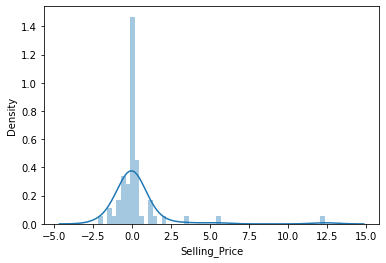

In [45]:
sns.distplot(y_test-prediction)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Selling_Price'>

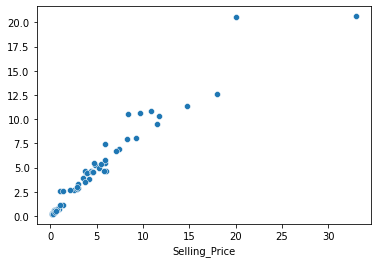

In [47]:
sns.scatterplot(y_test, prediction)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Selling_Price'>

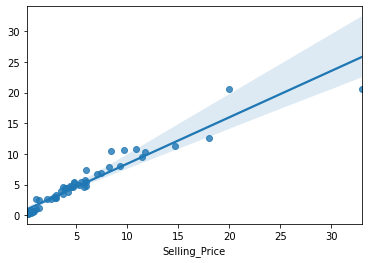

In [48]:
sns.regplot(y_test, prediction)

In [49]:
import pickle
file = open('random_forest_regression_model.pkl', 'wb')

#dump info
pickle.dump(rscv, file)

In [50]:
errors = abs(prediction - y_test)
mape = 100 * np.mean(errors / y_test)
accuracy = 100 - mape
print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))

Model Performance
Average Error: 0.7570 degrees.
Accuracy = 82.84%.
